In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 1 Cargar datos del csv
data = pd.read_csv('EntrenamientoE1_M0-M5-M6-M7_E3-M5.csv', header=None)
X = data.values  # 6735 muestras x 10 características

# Se especifican rangos
y = np.zeros(6735)
y[0:1353] = 0    # Movimiento 1 (reposo)
y[1354:2935] = 1 # Movimiento 2 (Abduccion de los dedos)
y[2936:4169] = 2 # Movimiento 3 (Dedos flexionados juntos)
y[4170:5243] = 3 # Movimiento 4 (señala con índice)
y[5244:6735] = 4 # Movimiento 5 (envoltura media)

# Convertir etiquetas a one-hot encoding
y = to_categorical(y)

# 2 Se divide conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3 Se normalizan los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4 Arquitectura de la red neuronal
model = Sequential([
    # Capa de entrada (10 neuronas, función tansig)
    Dense(10, activation='tanh', input_shape=(10,),
          kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    
    # Capa oculta (10 neuronas, función tansig)
    Dense(10, activation='tanh',
          kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    
    # Capa de salida (5 neuronas, función logsig)
    Dense(5, activation='sigmoid',
          kernel_initializer='glorot_uniform', bias_initializer='zeros')
])

# 5  Tasa de aprendizaje ajustable
learning_rate = 0.001 
optimizer = Adam(learning_rate=learning_rate)

# 6 Se compila el modelo
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Se entrena el modelo
batch_size = 32     # Procesara 32 muestras a la vez
epochs = 100       

history = model.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(X_test, y_test),
                   verbose=1)

# 8. Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en el conjunto de prueba: {accuracy*100:.2f}%')


Epoch 1/100


C:\Users\YaTuSabes\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4239 - loss: 1.4187 - val_accuracy: 0.7016 - val_loss: 1.0328
Epoch 2/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7076 - loss: 0.9721 - val_accuracy: 0.7647 - val_loss: 0.8030
Epoch 3/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7729 - loss: 0.7604 - val_accuracy: 0.7892 - val_loss: 0.6731
Epoch 4/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.6374 - val_accuracy: 0.8010 - val_loss: 0.5941
Epoch 5/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8243 - loss: 0.5422 - val_accuracy: 0.8203 - val_loss: 0.5483
Epoch 6/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8336 - loss: 0.5039 - val_accuracy: 0.8241 - val_loss: 0.5251
Epoch 7/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8430 - loss: 0.4711 - val_accuracy: 0.8337 - val_loss: 0.5066
Epoch 8/100
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.4420 - val_accuracy: 0.8367

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


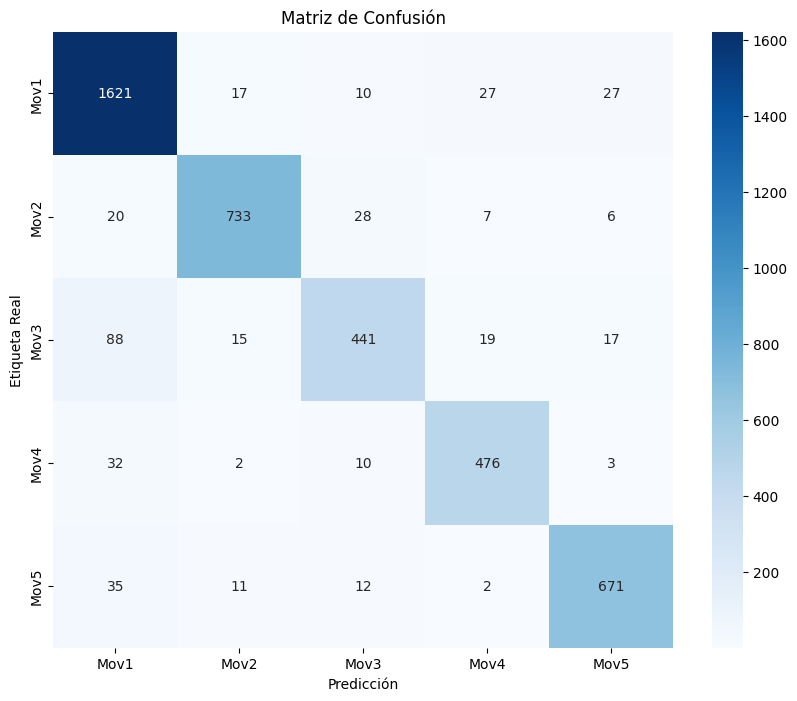


Reporte de Clasificación:
              precision    recall  f1-score   support

        Mov1       0.90      0.95      0.93      1702
        Mov2       0.94      0.92      0.93       794
        Mov3       0.88      0.76      0.82       580
        Mov4       0.90      0.91      0.90       523
        Mov5       0.93      0.92      0.92       731

    accuracy                           0.91      4330
   macro avg       0.91      0.89      0.90      4330
weighted avg       0.91      0.91      0.91      4330


Precisión Global: 91.04%


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model


test_data = pd.read_csv('TestE1_M0-M5-M6-M7_E3-M5.csv', header=None)
X_test = test_data.values

y_test = np.zeros(4330)  #4330 muestras en total
y_test[0:1698] = 0       # Movimiento 1 (reposo)
y_test[1699:2493] = 1    # Movimiento 2 (Abducción de los dedos)
y_test[2494:3074] = 2    # Movimiento 3 (dedos flexionados)
y_test[3075:3598] = 3    # Movimiento 4 (señala con índice)
y_test[3599:4330] = 4    # Movimiento 5 (envoltura media)


X_test = scaler.transform(X_test)  

#  predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#  matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# grafica
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Mov1', 'Mov2', 'Mov3', 'Mov4', 'Mov5'],
            yticklabels=['Mov1', 'Mov2', 'Mov3', 'Mov4', 'Mov5'])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()


print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_classes, 
                           target_names=['Mov1', 'Mov2', 'Mov3', 'Mov4', 'Mov5']))

# 8. Precisión general
accuracy = np.sum(y_pred_classes == y_test) / len(y_test)
print(f"\nPrecisión Global: {accuracy*100:.2f}%")